### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [2]:
!pip install eli5 neattext spacy numpy seaborn altair streamlit pandas

     |████████████████████████████████| 106 kB 8.4 MB/s 
     |████████████████████████████████| 114 kB 32.8 MB/s 
     |████████████████████████████████| 8.3 MB 43.9 MB/s 
     |████████████████████████████████| 111 kB 63.6 MB/s 
     |████████████████████████████████| 180 kB 72.5 MB/s 
     |████████████████████████████████| 4.3 MB 48.2 MB/s 
     |████████████████████████████████| 76 kB 5.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 124 kB 42.3 MB/s 
     |████████████████████████████████| 788 kB 48.6 MB/s 
     |████████████████████████████████| 370 kB 67.2 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=dd55161d1cff8536378a75b054ba8870a056addd1dce2841a71c31411641b78a
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-tool

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [6]:
# Load Dataset
df = pd.read_csv("emotion_dataset_raw.csv")

In [7]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [9]:
df.shape

(34792, 2)

In [11]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [10]:
df.describe

<bound method NDFrame.describe of         Emotion                                               Text
0       neutral                                             Why ? 
1           joy    Sage Act upgrade on my to do list for tommorow.
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3           joy   Such an eye ! The true hazel eye-and so brill...
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
...         ...                                                ...
34787  surprise  @MichelGW have you gift! Hope you like it! It'...
34788       joy  The world didnt give it to me..so the world MO...
34789     anger                           A man robbed me today . 
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...
34791   sadness  I think about you baby, and I dream about you ...

[34792 rows x 2 columns]>

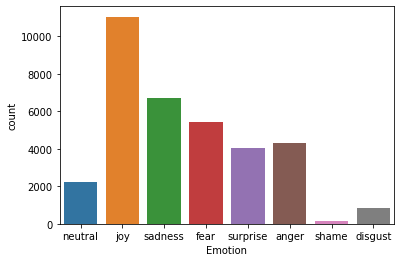

In [12]:
# Plot
sns.countplot(x='Emotion',data=df)

In [ ]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:
# removing user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [14]:
# removing stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [15]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [16]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [17]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [18]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

In [ ]:
pipe_lr

In [21]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6200421536692853

In [28]:
# Make A Prediction
example = "I absolutely love watching space movies."

In [29]:
pipe_lr.predict([example])

array(['joy'], dtype=object)

In [31]:
# Prediction Prob
pipe_lr.predict_proba([example])

array([[0.03099269, 0.02596045, 0.06770467, 0.44105622, 0.03873029,
        0.36587189, 0.00172637, 0.02795742]])

In [32]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [34]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()